In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dfx=pd.read_csv("D:\programs\Machine Learning\Linear Regression\Assignment 1-20211110T194807Z-001\Assignment 1\Training Data\Linear_X_Train.csv")
dfy=pd.read_csv("D:\programs\Machine Learning\Linear Regression\Assignment 1-20211110T194807Z-001\Assignment 1\Training Data\Linear_Y_Train.csv")
x=dfx.values
y=dfy.values 
x=x.reshape((-1,))
y=y.reshape((-1,))
print(x.shape, y.shape) 

(3750,) (3750,)


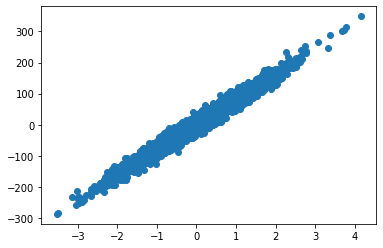

In [7]:
X = (x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)

In [8]:
def hypothesis(Xx,theta):
    return theta[0] + theta[1]*Xx

In [9]:
def error(x,theta,y):
    err = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx-y[i])**2
        
    return err

In [10]:
def gradient(Xx,theta,Yy):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(Xx[i],theta)
        grad[0] +=  (hx-Yy[i])
        grad[1] += (hx-Yy[i])*Xx[i]
        
    return grad/m

In [11]:
def gradientDescent(x,y,learning_rate = 0.01):
    
    
    theta = np.zeros((2,))
    
    err_list = []
    theta_list = []
    
    for i in range(1000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        
        err_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= (learning_rate*(grad[0]))
        theta[1] -= (learning_rate*grad[1])
    
    return theta,err_list,theta_list

In [12]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

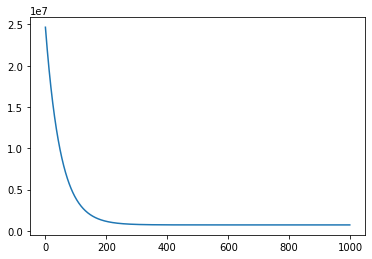

In [13]:
plt.plot(error_list)

In [14]:
xtest = pd.read_csv("D:\programs\Machine Learning\Linear Regression\Assignment 1-20211110T194807Z-001\Assignment 1\Testing Data\Linear_X_Test.csv")
xtest = xtest.values
xtest = xtest.reshape((-1,))
print(xtest.shape)
test = xtest

(1250,)


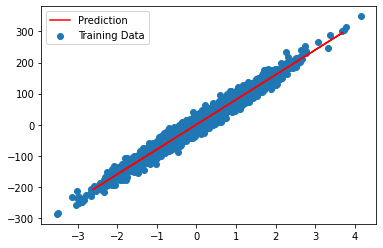

In [15]:
plt.scatter(X,Y,label='Training Data')
plt.plot(test,hypothesis(test,final_theta),color='Red',label="Prediction")
plt.legend()
plt.show()